In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
# drop id column
df.drop("Id",axis=1,inplace=True)

In [7]:
spec = df["Species"].unique()

In [8]:
spec

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder
# encode the target

le = LabelEncoder()

df["Species"] = le.fit_transform(df["Species"])


In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

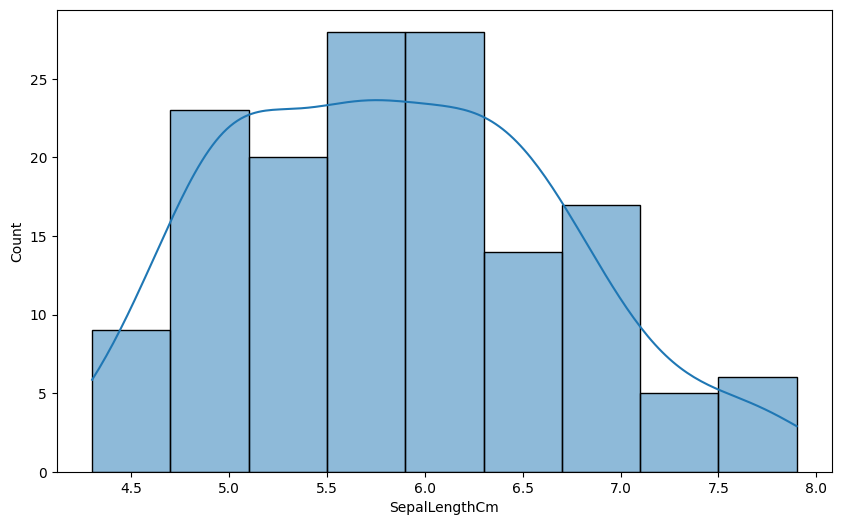

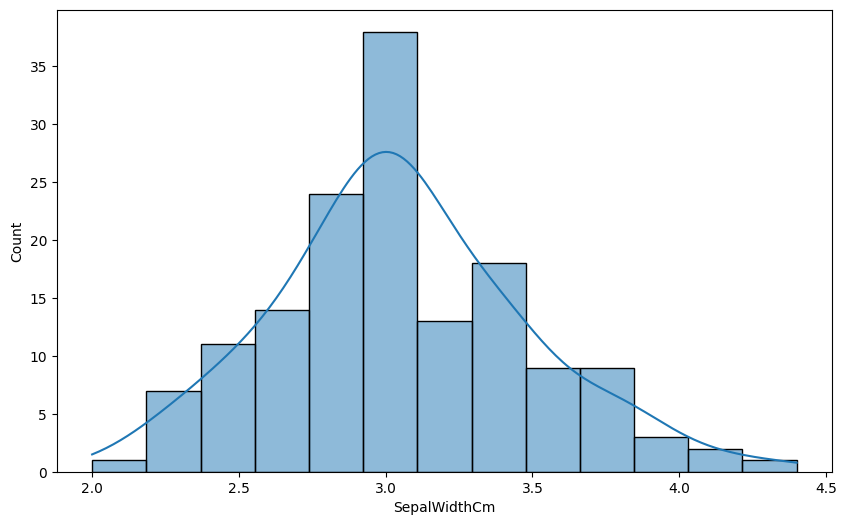

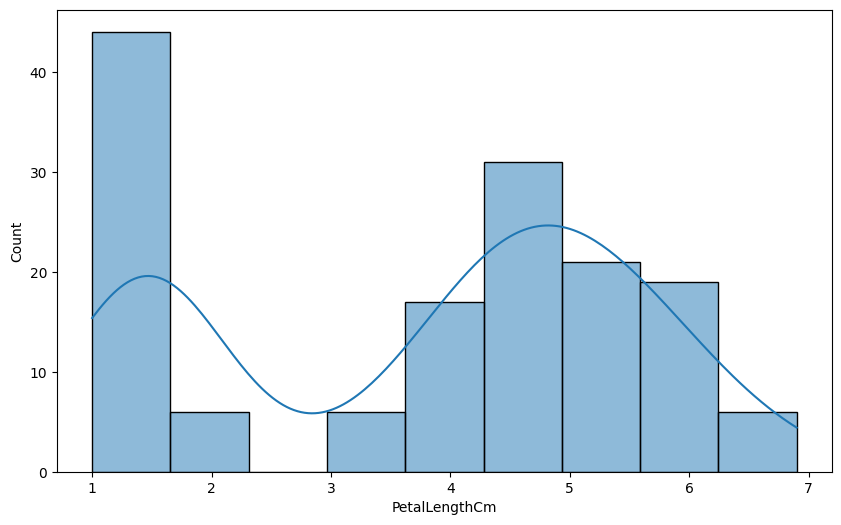

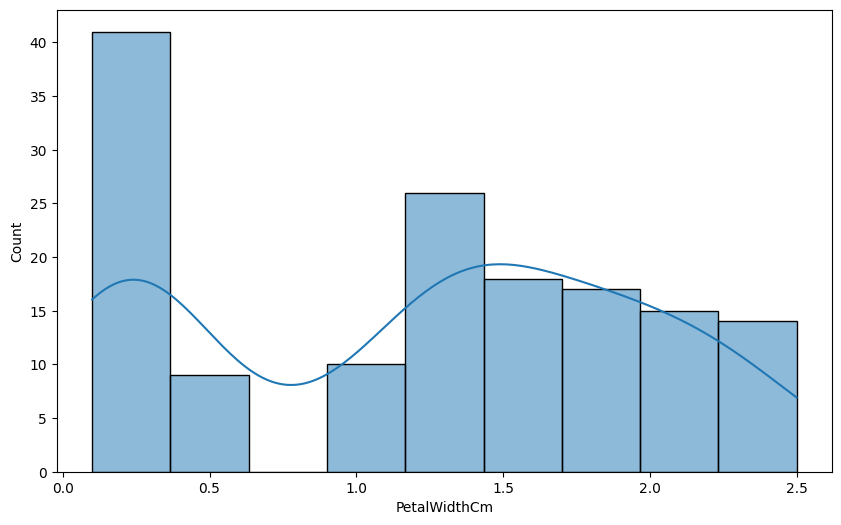

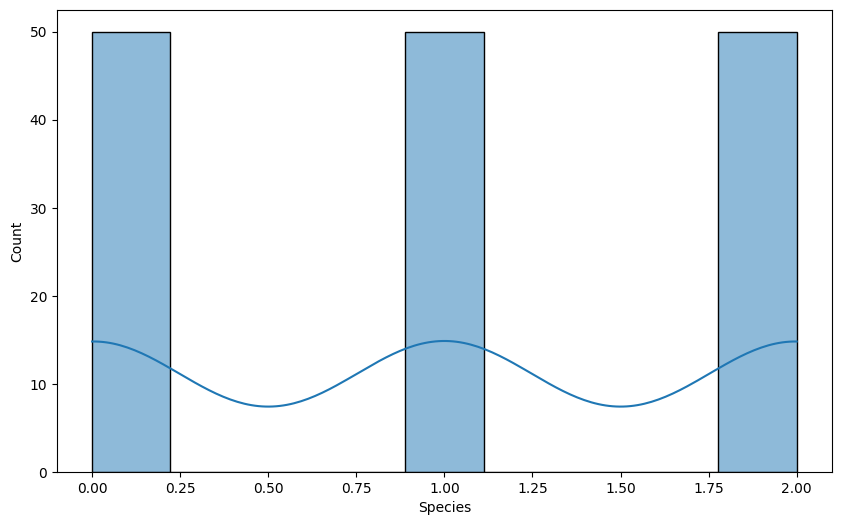

In [11]:
for features in df.columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[features],kde=True)

## Splitting the data

In [12]:
X = df.drop("Species",axis=1)
y = df["Species"]


In [14]:
from sklearn.preprocessing import MinMaxScaler
# Standardize the data

k = MinMaxScaler()

X = pd.DataFrame(k.fit_transform(X),columns=X.columns)


In [15]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,f1_score


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)

In [81]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

In [82]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

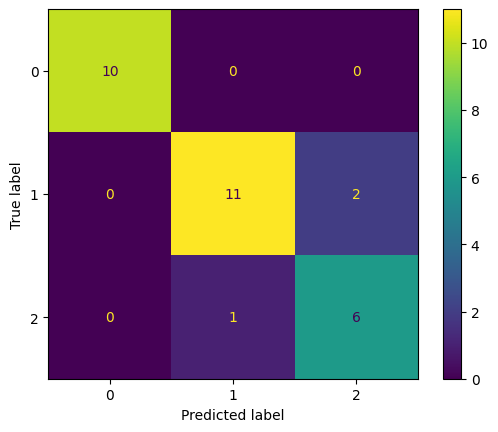

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)

ConfusionMatrixDisplay(cm).plot()


In [84]:
from sklearn.metrics import accuracy_score

print("the accuracy socre of the knn model with k=3 is ",accuracy_score(y_test,y_pred))

the accuracy socre of the knn model with k=3 is  0.9


## Check different values of k using validation-curve

In [85]:
from sklearn.model_selection import validation_curve

param_range = range(1,15,2)

train_score,test_score = validation_curve(KNeighborsClassifier(),X_train,y_train,param_name = "n_neighbors",param_range = param_range,cv=5,scoring="f1_macro")


In [86]:
train_mean = np.mean(train_score,axis=1)
test_mean = np.mean(test_score,axis=1)

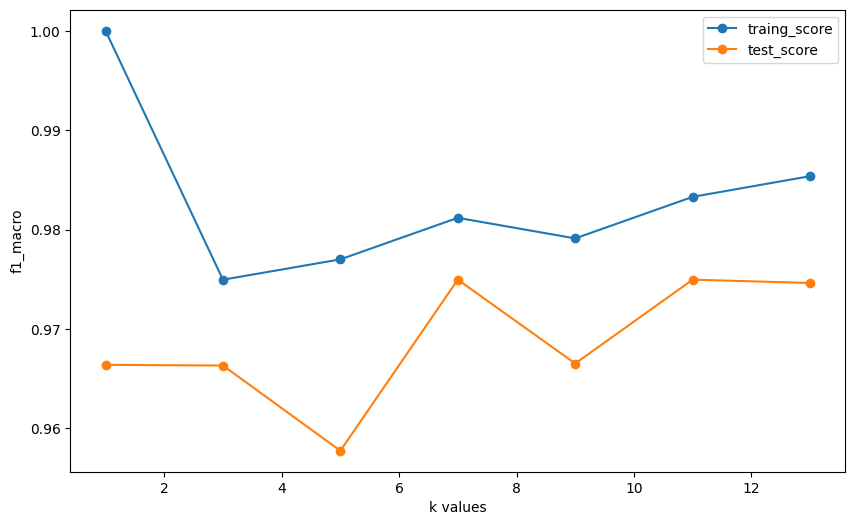

In [87]:
plt.figure(figsize = (10,6))

plt.plot(param_range,train_mean,label="traing_score",marker="o")

plt.plot(param_range,test_mean,label="test_score",marker="o")

plt.xlabel("k values")
plt.ylabel("f1_macro")
plt.legend()
plt.show()



## Analysis
* It looks like from 1 to 3 ,the training f1 is decreasing and test f1 score is increasing,it is generalisable
* The f1 score for test is particularly high at k = 11,which is closer to the value train f1 score.
* The train data initially had high f1 score,due small value of k (overfitting) but started decreasing due increasing k (reduce overfitting)
* According to this analysis,k = 11 is the best for this model as it is giving high f1 score for test set (unseen data) and k=11 is also good for this dataset as it is still in the local neighbourhood of the data

In [88]:
knn2 = KNeighborsClassifier(n_neighbors=11)

In [89]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

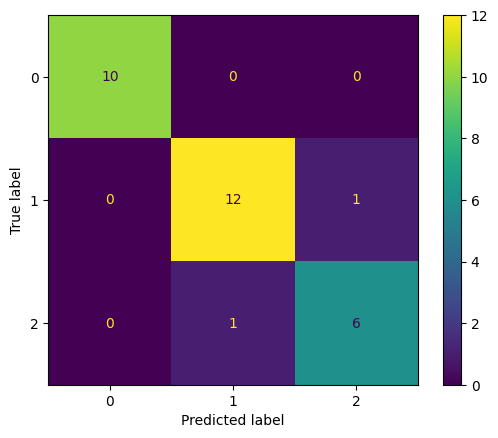

In [90]:
y_pred = knn2.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

<Axes: >

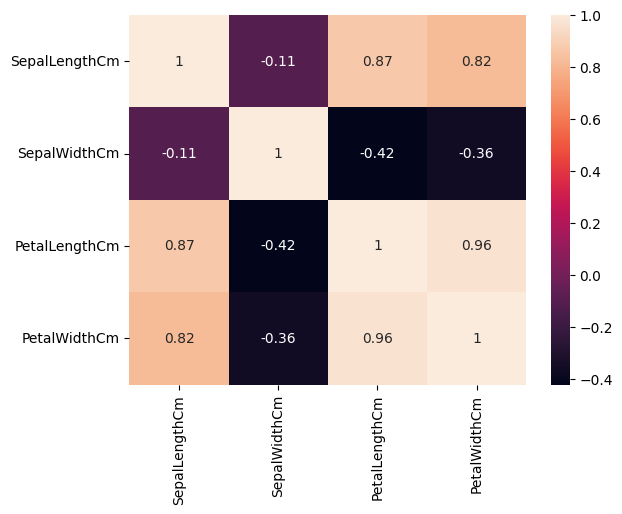

In [123]:
sns.heatmap(X.corr(),annot=True)

In [93]:
X_train.shape

(120, 4)

In [105]:
spec

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [94]:
X_train.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

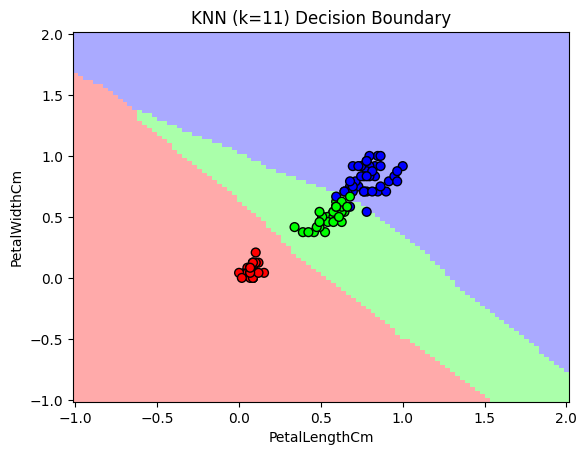

In [121]:
def plot_knn_decision_boundary(X_train, y_train, n_neighbors=5):
    """
    Visualize KNN decision boundary after keeping only 2 features.
    
    Args:
        X_train: DataFrame with >=2 features
        y_train: Target labels
        n_neighbors: KNN hyperparameter
    """
    # Ensure we have exactly 2 features
    if X_train.shape[1] != 2:
        raise ValueError(f"X_train must have 2 features, but got {X_train.shape[1]}")

    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Background
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Points

    # Plot decision boundary
    DecisionBoundaryDisplay.from_estimator(
        knn,
        X_train,
        cmap=cmap_light,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )
    
    # Plot training points
    scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, 
                cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(f"KNN (k={n_neighbors}) Decision Boundary")
    plt.xlabel(X_train.columns[0])  # Use actual feature names
    plt.ylabel(X_train.columns[1])
    plt.show()

# Example usage:
plot_knn_decision_boundary(X_train[["PetalLengthCm", "PetalWidthCm"]], y_train, n_neighbors=11)

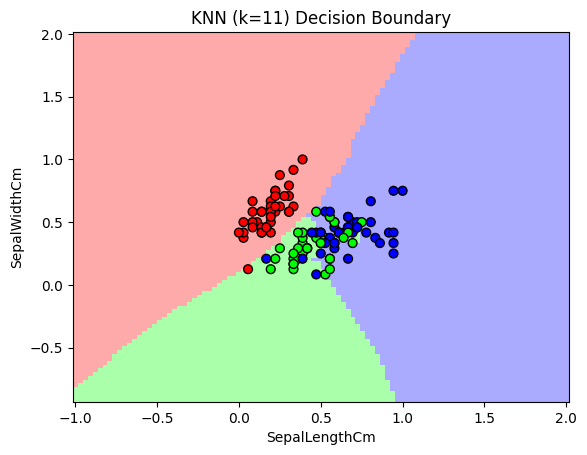

In [117]:
plot_knn_decision_boundary(X_train[["SepalLengthCm", "SepalWidthCm"]], y_train, n_neighbors=11)

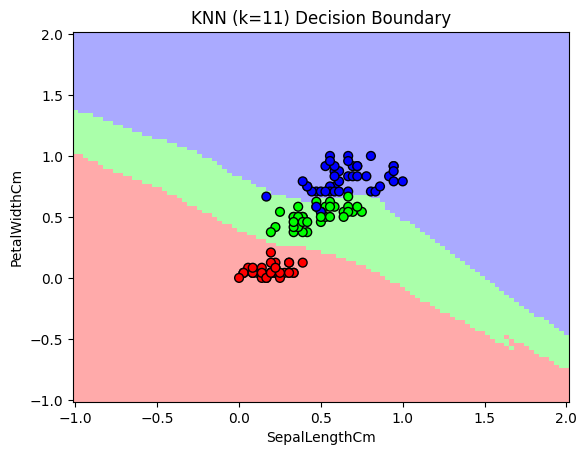

In [118]:
plot_knn_decision_boundary(X_train[["SepalLengthCm", "PetalWidthCm"]], y_train, n_neighbors=11)

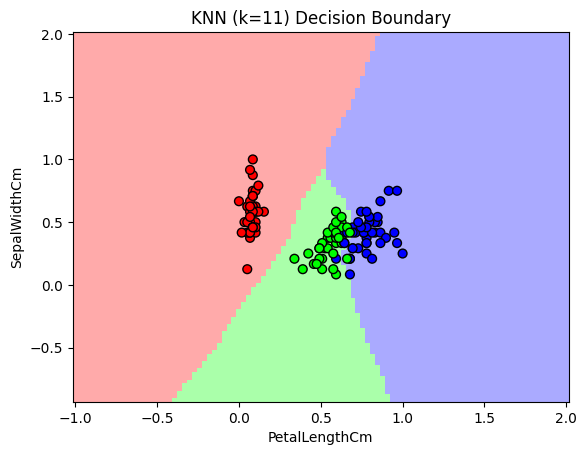

In [119]:
plot_knn_decision_boundary(X_train[["PetalLengthCm", "SepalWidthCm"]], y_train, n_neighbors=11)

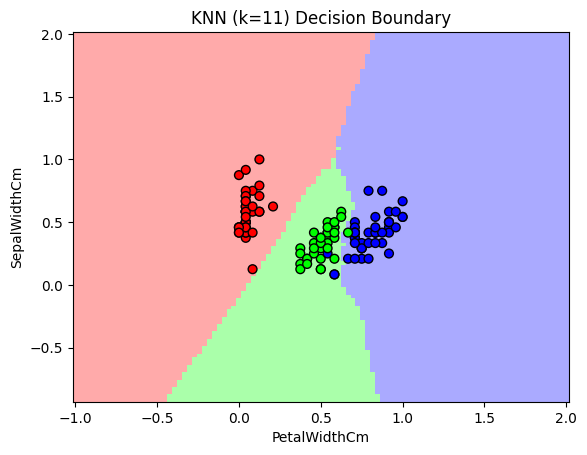

In [124]:
plot_knn_decision_boundary(X_train[["PetalWidthCm", "SepalWidthCm"]], y_train, n_neighbors=11)